In [106]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
%matplotlib inline

from MoDE import MoDE
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [107]:
data = loadmat("data/small_stock.mat")["StockData"]
score = loadmat("data/small_stock.mat")["Score"]

In [108]:
#normalize
m = np.mean(data, axis=1)
data = data - m.reshape((-1,1))

s = np.max(data, axis=1) - np.min(data, axis=1)
data = data / s.reshape((-1,1))

In [109]:
data.shape

(436, 128)

In [110]:
# for now using exact distance matrix
from sklearn.metrics import pairwise_distances
dm = pairwise_distances(data, n_jobs=-1)

In [111]:
# temporary: for now limit the decimals
dm = np.round(dm, decimals=5)

In [112]:
mode = MoDE(n_neighbor=20, max_iter=100000, tol=0.0001, verbose=True)

In [113]:
x_2d = mode.fit_transform(data, score.squeeze(), dm, dm)

[200, 435]
0.005747126436781609
Start of Gradient Descent algorithm
0 out of 100000 iterations has passed
10000 out of 100000 iterations has passed
20000 out of 100000 iterations has passed
GD stopped after 26000 iteration
end of GD algorithm


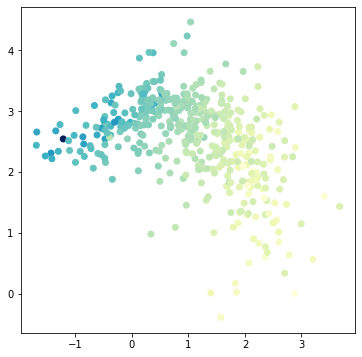

In [114]:
plt.figure(figsize=(6,6))
plt.scatter(x_2d[:,0], x_2d[:, 1], c = np.log(score.squeeze()), cmap="YlGnBu")